<a href="https://colab.research.google.com/github/BonneyBoja/Bonney-s-Portfolio/blob/main/Explatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data = "brand: Ford, model: F-150, model_year: 2023, milage: 2,823 mi., price: 45000; brand: BMW, model: 740 iL, model_year: 2001, milage: 242,000 mi., price: 8500; brand: Tesla, model: Model X, model_year: 2020, milage: 34,000 mi., price: 75000"

# Split into car entries
cars = data.split(";")

parsed_data = []

for car in cars:
    car = car.strip()
    if car == "":
        continue

    attributes = car.split(",")
    car_dict = {}

    for item in attributes:
        item = item.strip()
        # Only process key-value pairs that contain ":"
        if ":" in item:
            key, value = item.split(":", 1)
            car_dict[key.strip()] = value.strip()

    parsed_data.append(car_dict)

# Convert to DataFrame
df = pd.DataFrame(parsed_data)

# Clean columns
df['model_year'] = df['model_year'].astype(int)
df['milage'] = df['milage'].str.replace(",", "").str.replace(" mi.", "").astype(int)
df['price'] = df['price'].astype(int)

df


,brand,model,model_year,milage,price
0,Ford,F-150,2023,2,45000
1,BMW,740 iL,2001,242,8500
2,Tesla,Model X,2020,34,75000


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving used_cars.csv to used_cars (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("used_cars.csv")
df.head()


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


In [ ]:
# Remove commas and the " mi." text
df['milage'] = df['milage'].str.replace(",", "").str.replace(" mi.", "")

# Convert to integer
df['milage'] = df['milage'].astype(int)


In [ ]:
df['accident_flag'] = df['accident'].str.contains("Accident", case=False, na=False).astype(int)


In [ ]:
current_year = 2025
df['car_age'] = current_year - df['model_year']


In [ ]:
df['horsepower'] = df['engine'].str.extract(r'(\d+\.?\d*)\s*HP', expand=False)

# Convert to numeric
df['horsepower'] = df['horsepower'].astype(float)


In [ ]:
print(df.head())
print(df.info())


      brand                            model  model_year  milage  \
0      Ford  Utility Police Interceptor Base        2013   51000   
1   Hyundai                     Palisade SEL        2021   34742   
2     Lexus                    RX 350 RX 350        2022   22372   
3  INFINITI                 Q50 Hybrid Sport        2015   88900   
4      Audi        Q3 45 S line Premium Plus        2021    9835   

       fuel_type                                             engine  \
0  E85 Flex Fuel  300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...   
1       Gasoline                               3.8L V6 24V GDI DOHC   
2       Gasoline                                     3.5 Liter DOHC   
3         Hybrid  354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...   
4       Gasoline                         2.0L I4 16V GDI DOHC Turbo   

        transmission                 ext_col int_col  \
0        6-Speed A/T                   Black   Black   
1  8-Speed Automatic         Moonlight Cloud    Gray

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure plots display well
sns.set(style="whitegrid")


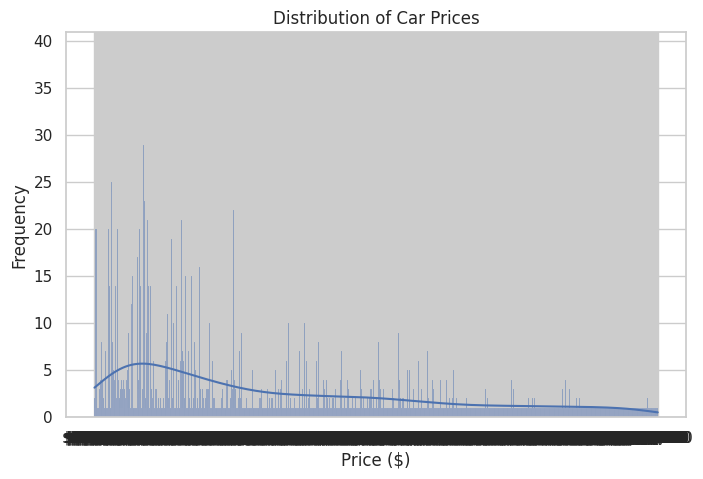

In [ ]:
#Histogram of Car Price
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="price", kde=True)
plt.title("Distribution of Car Prices")
plt.xlabel("Price ($)")
plt.ylabel("Frequency")
plt.show()


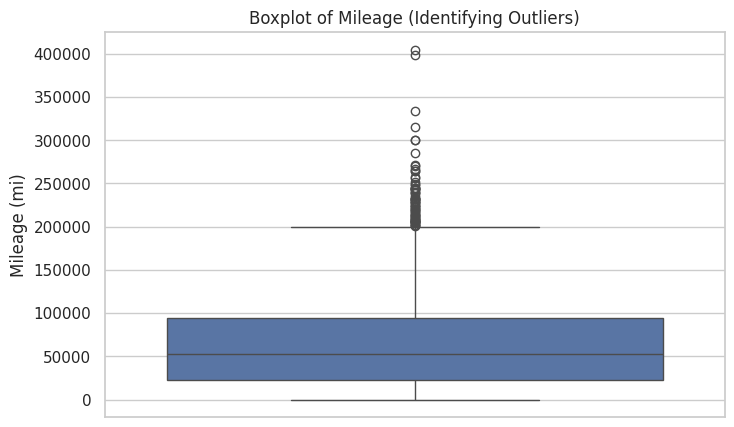

In [ ]:
#Boxplot for Mileage
plt.figure(figsize=(8,5))
sns.boxplot(data=df, y="milage")
plt.title("Boxplot of Mileage (Identifying Outliers)")
plt.ylabel("Mileage (mi)")
plt.show()


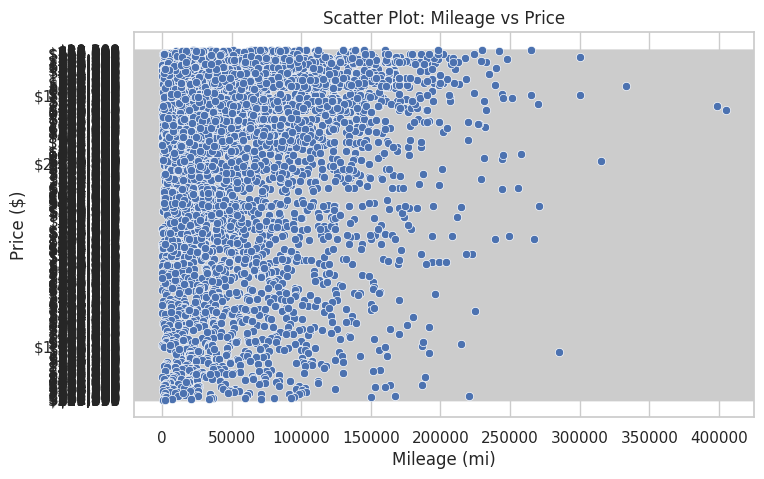

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="milage", y="price")
plt.title("Scatter Plot: Mileage vs Price")
plt.xlabel("Mileage (mi)")
plt.ylabel("Price ($)")
plt.show()


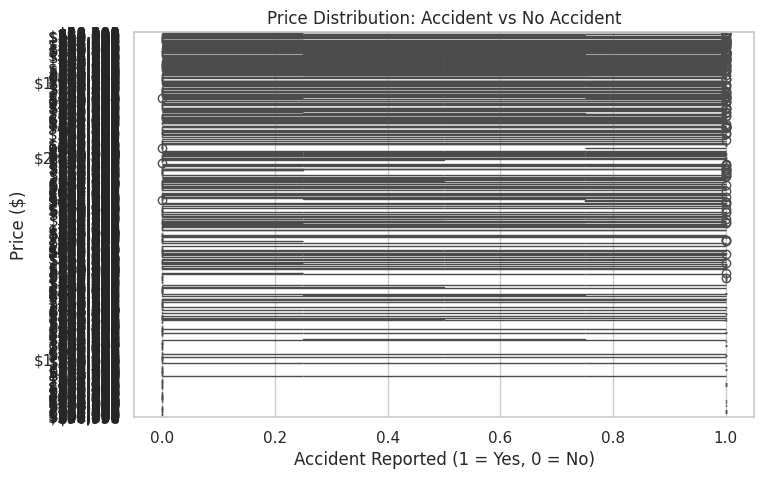

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="accident_flag", y="price")
plt.title("Price Distribution: Accident vs No Accident")
plt.xlabel("Accident Reported (1 = Yes, 0 = No)")
plt.ylabel("Price ($)")
plt.show()


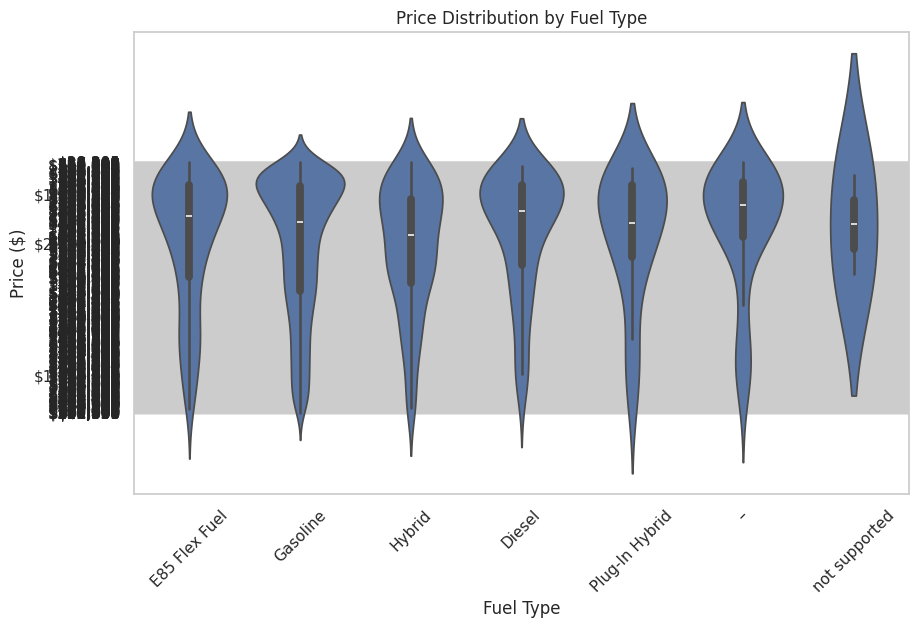

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="fuel_type", y="price")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price ($)")
plt.xticks(rotation=45)
plt.show()


In [ ]:
### Key Insights from EDA

1. Cars with higher mileage tend to have lower prices.
   The scatter plot shows a negative relationship between mileage and price. This means as mileage increases, the car’s resale value generally decreases. Dealerships can use this trend to adjust pricing for high-mileage inventory.

2. Cars with accident history have lower median prices.
   The box plot comparing accident vs non-accident vehicles shows that cars reported with accidents are priced lower. This suggests customers strongly prefer cars with a clean history and dealerships may need to discount accident vehicles more.

3. Fuel type affects car pricing.
   The violin plot indicates that hybrid and electric vehicles tend to have higher price distributions compared to gasoline cars. This is likely due to newer technology, better fuel efficiency, and higher market demand for eco-friendly vehicles.


SyntaxError: invalid character '’' (U+2019) (ipython-input-1508255203.py, line 4)